<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/APIs/1_APIs_Geograficas/clase-1-ejercicios-resueltos.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Clase 1: ejercicios prácticos resueltos

In [1]:
import requests
import pandas as pd
import geopandas as gpd
from urllib.parse import urlencode, urljoin
import matplotlib 
import helpers
%matplotlib inline

## Ejercicio 1: API Georef 

* Genera una lista en un dataframe de todas las calles que se llaman "San Martin" en la Argentina. Cuantas son?

In [25]:
calles_san_martin = pd.read_csv(
    'https://apis.datos.gob.ar/georef/api/calles?nombre=san%20martin&formato=csv&max=5000'
)
calles_san_martin

,calle_id,calle_nombre,calle_altura_inicio_derecha,calle_altura_inicio_izquierda,calle_altura_fin_derecha,calle_altura_fin_izquierda,calle_nomenclatura,calle_categoria,provincia_id,provincia_nombre,departamento_id,departamento_nombre,localidad_censal_id,localidad_censal_nombre
0,605601004700,SAN MARTIN,1,0,899,802,"SAN MARTIN, Bahía Blanca, Buenos Aires",CALLE,6,Buenos Aires,6056,Bahía Blanca,6056010,Bahía Blanca
1,607001000700,SAN MARTIN,0,0,3500,3399,"SAN MARTIN, Baradero, Buenos Aires",CALLE,6,Buenos Aires,6070,Baradero,6070010,Baradero
2,607701000815,SAN MARTIN,0,0,599,500,"SAN MARTIN, Arrecifes, Buenos Aires",CALLE,6,Buenos Aires,6077,Arrecifes,6077010,Arrecifes
3,611201000905,SAN MARTIN,0,0,2400,2399,"SAN MARTIN, Bragado, Buenos Aires",CALLE,6,Buenos Aires,6112,Bragado,6112010,Bragado
4,611905000865,SAN MARTIN,0,0,0,0,"SAN MARTIN, Brandsen, Buenos Aires",CALLE,6,Buenos Aires,6119,Brandsen,6119050,Coronel Brandsen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,637101000405,AV GRL LIBERTADOR SAN MARTIN AV 85,0,0,1599,1600,"AV GRL LIBERTADOR SAN MARTIN AV 85, Ciudad Lib...",AV,6,Buenos Aires,6371,Ciudad Libertador San Martín,6371010,General San Martín
576,7802801000085,AV DEL LDOR GRL SAN MARTIN - RUTA 11,0,0,0,0,"AV DEL LDOR GRL SAN MARTIN - RUTA 11, Lago Arg...",AV,78,Santa Cruz,78028,Lago Argentino,78028010,El Calafate
577,627001003860,RUTA NAC 205 AV LDOR GRL SAN MARTIN,0,0,499,0,"RUTA NAC 205 AV LDOR GRL SAN MARTIN, José M. E...",RUTA,6,Buenos Aires,6270,José M. Ezeiza,6270010,Ezeiza
578,604902001130,SAN SERAPIO MARTIR,0,0,0,0,"SAN SERAPIO MARTIR, Azul, Buenos Aires",CALLE,6,Buenos Aires,6049,Azul,6049020,Azul


* Hace un mapa de las representaciones diplomaticas extranjeras en la Argentina. Para esto descarga las direcciones del dataset ["Guia Diplomatica"](https://datos.gob.ar/dataset/exterior-guia-diplomatica), georreferencialas, crea un GeoDataframe con ellas y mapealas sobre una capa de provincias de Argentina. Sugerencias:
    - Usa `pd.read_excel()` directamente con la URL de descarga de la lista de representaciones extranjeras.
    - Cuando descargues las embajadas, elimina aquellas que no tengan direccion, porque hace fallar la georreferenciacion (`embajadas.dropna(subset=['representacion_direccion']`)

In [6]:
embajadas = pd.read_excel(
    'https://cancilleria.gob.ar/userfiles/datos/representaciones-extranjeras.xlsx'
)

In [7]:
embajadas = embajadas.dropna(subset=['representacion_direccion'])

In [8]:
embajadas

,representacion_pais_descripcion,representacion_pais_iso,representacion_descripcion,representacion_circunscripcion,representacion_ciudad_descripcion,representacion_provincia_descripcion,representacion_direccion,representacion_email,representacion_pagina_web,representacion_horario_atencion,representacion_cuidad_codigo_tel,representacion_telefono,representacion_fax,representacion_telefax,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
1,Alemania,DE,Consulado Honorario de ALEMANIA en Córdoba,Provincia de Córdoba,Córdoba,Córdoba,Eliseo Cantón 1870,NaN,NaN,NaN,351,NaN,NaN,489-0900,NaN,NaN,NaN,NaN,NaN
2,Alemania,DE,Consulado Honorario de ALEMANIA en El Dorado,Los departamentos de la Provincia de Misiones ...,El Dorado,Misiones,San Juan 1595 - PB,NaN,NaN,NaN,3751,423-214,423-214,NaN,NaN,NaN,NaN,NaN,NaN
3,Alemania,DE,Consulado Honorario de ALEMANIA en Mendoza,"Provincias de Mendoza, San Juan y San Luis",Mendoza,Mendoza,Peatonal Sarmiento N° 165/199,NaN,NaN,NaN,261,4201077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alemania,DE,Consulado Honorario de ALEMANIA en Posadas,Los departamentos de la Provincia de Misione...,Posadas,Misiones,Junín 1811 P 2 of 1,NaN,NaN,NaN,3752,443-5508//443-0570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alemania,DE,Consulado Honorario de ALEMANIA en Salta,Provincias de Jujuy y Salta,Salta,Salta,Caseros N°1874,NaN,NaN,NaN,387,422-9088//492-1184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Uruguay,UY,Embajada de URUGUAY,,Ciudad Autónoma de Buenos Aires,Buenos Aires,Arenales N° 1392,uruargentina@mrree.gub.uy,NaN,NaN,11,6009-4020,6009-4080,NaN,NaN,NaN,NaN,NaN,NaN
486,Venezuela,VE,Consulado General de VENEZUELA en Ciudad Autón...,Todo el territorio de la República Argentina,Ciudad Autónoma de Buenos Aires,Buenos Aires,Virrey Loreto 2035,embaven@arnet.com.ar,http://www.la-embajada.com.ar/,NaN,11,4788-4944,4129-0823/0824,NaN,NaN,NaN,NaN,NaN,NaN
487,Venezuela,VE,Embajada de VENEZUELA,,Ciudad Autónoma de Buenos Aires,Buenos Aires,Av. Luis María Campos 170,despacho.argentina@mppre.gob.ve,http://argentina.embajada.gob.ve,NaN,11,4129-0800//63921135,4129-0823,NaN,NaN,NaN,NaN,NaN,NaN
488,Vietnam,VN,Embajada de VIETNAM,,Ciudad Autónoma de Buenos Aires,Buenos Aires,11 de Septiembre 1442,atn.sqvn@gmail.com//,NaN,NaN,11,4783-1425//4783-1802,4782-0078,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
embajadas_direcciones = helpers.georreferenciar_direcciones(
    embajadas,
    nombre_campo='representacion_direccion',
    provincia_campo='representacion_provincia_descripcion'
)

In [15]:
embajadas_direcciones

,direccion_normalizada,latitud,longitud,provincia_id,provincia_nombre
0,"DR ELISEO CANTON 1870, Capital, Córdoba",-31.396194,-64.203748,14,Córdoba
1,None,NaN,NaN,NaN,NaN
2,None,NaN,NaN,NaN,NaN
3,None,NaN,NaN,NaN,NaN
4,"CASEROS 1874, Capital, Salta",-24.788640,-65.428614,66,Salta
...,...,...,...,...,...
452,"ARENALES 1392, Merlo, Buenos Aires",-34.697688,-58.728085,06,Buenos Aires
453,"VIRREY LORETO 2035, Almirante Brown, Buenos Aires",-34.823240,-58.355989,06,Buenos Aires
454,"AV LUIS MARIA CAMPOS 170, Comuna 14, Ciudad Au...",-34.575038,-58.430997,02,Ciudad Autónoma de Buenos Aires
455,"11 DE SEPTIEMBRE 1442, Tandil, Buenos Aires",-37.312035,-59.130081,06,Buenos Aires


In [19]:
embajadas_normalizadas = pd.concat([embajadas.reset_index(), embajadas_direcciones], axis=1)

In [20]:
embajadas_gdf = gpd.GeoDataFrame(
    embajadas_normalizadas, 
    geometry=gpd.points_from_xy(
        embajadas_normalizadas.longitud.astype(float), 
        embajadas_normalizadas.latitud.astype(float)
    )
)

In [22]:
provincias = gpd.read_file(
        'https://apis.datos.gob.ar/georef/api/provincias?max=100&formato=shp'
    )

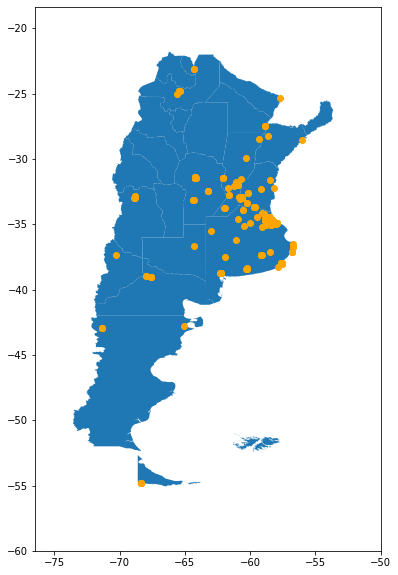

In [24]:
ax = provincias.plot(figsize=(10,10))

# se setean limites para no graficar la Antartida
ax.set_xlim(right=-50)
ax.set_ylim(bottom=-60)

embajadas_gdf.plot(ax=ax, color='orange')

## Ejercicio 2: API Nominatim

Crea distintos mapas que tengan al mapa de las comunas de la Ciudad de Buenos Aires como base, y sobre el dibujen los puntos de coordenadas de:

* Los 10 restaurantes mas cercanos al centroide del barrio de Almagro
* Los 10 hospitales mas cercanos al centroide de Villa Urquiza
* Las 10 escuelas mas cercanas al centroide de Villa Devoto

Sugerencia: crea una funcion "buscar" que tome un texto de busqueda y haga la consulta a la API de Nominatim, y otra funcion "mapear" que tome un texto de busqueda y haga el mapa de los puntos sobre las comunas de la CABA. Usa la funcion mapear() para hacer los 3 mapas solicitados.

In [110]:
def buscar(q, addressdetails=1, format='json', limit=50):
    '''Busca objetos geograficos en OSM.'''
    
    # toma los parametros de la funcion como un diccionario
    params = locals()
    
    # crea url de consulta
    url_base = 'https://nominatim.openstreetmap.org/?'
    query_string = urlencode(params)
    url = url_base + query_string
    print(url)
    
    # obtiene resultados y los convierte en un GeoDataframe
    resultados = requests.get(url).json()
    print(len(resultados), 'encontrados')
    
    df = pd.DataFrame(resultados)
    gdf = gpd.GeoDataFrame(
        df, 
        geometry=gpd.points_from_xy(df.lon.astype(float), 
                                    df.lat.astype(float))
    )
    
    return gdf

In [111]:
def mapear(q):
    comunas_caba = gpd.read_file(
        'https://apis.datos.gob.ar/georef/api/departamentos?provincia=02&max=100&formato=shp'
    )
    objetos = buscar(q)
    ax = comunas_caba.plot(figsize=(10,10))
    return objetos.plot(ax=ax, color='orange')

https://nominatim.openstreetmap.org/?q=restaurantes%2C+almagro%2C+ciudad+de+buenos+aires%2C+argentina&addressdetails=1&format=json&limit=50
50 encontrados


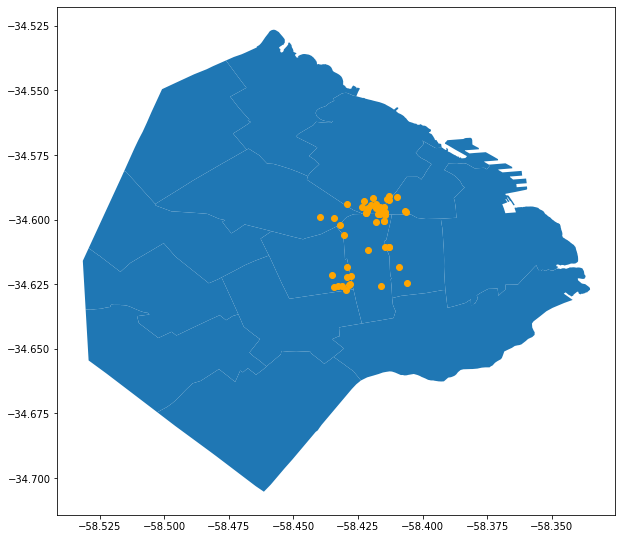

In [112]:
mapear('restaurantes, almagro, ciudad de buenos aires, argentina')

https://nominatim.openstreetmap.org/?q=centros+de+salud%2C+caballito%2C+ciudad+de+buenos+aires%2C+argentina&addressdetails=1&format=json&limit=50
50 encontrados


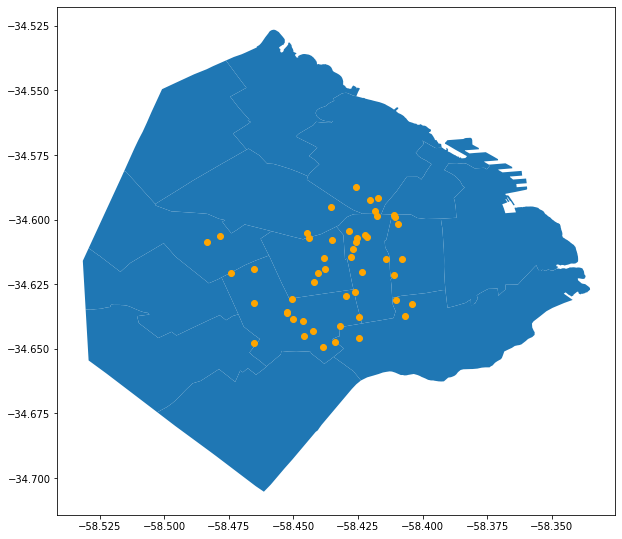

In [113]:
mapear('centros de salud, caballito, ciudad de buenos aires, argentina')

https://nominatim.openstreetmap.org/?q=escuelas%2C+devoto%2C+ciudad+de+buenos+aires%2C+argentina&addressdetails=1&format=json&limit=50
50 encontrados


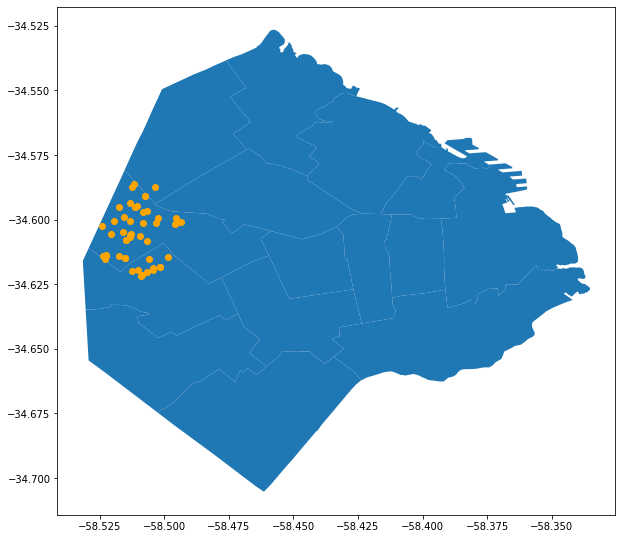

In [114]:
mapear('escuelas, devoto, ciudad de buenos aires, argentina')